<a href="https://colab.research.google.com/github/jj2883/Applied_DL_COMS4995/blob/master/App_DL_HW2_Part2_P3_jj2883.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically in TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.applications import MobileNet, NASNetMobile, DenseNet121, VGG16, Xception, InceptionV3, ResNet50
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [2]:
#mount google drive
from google.colab import drive, files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base_dir = '/content/drive/My Drive/App_DL_hw2/app_DL_hw2_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_mater_dir = os.path.join(train_dir, 'mater')
train_matelier_dir = os.path.join(train_dir, 'matelier')
train_amringe_dir = os.path.join(train_dir, 'amringe')

validation_mater_dir = os.path.join(validation_dir, 'mater')
validation_matelier_dir = os.path.join(validation_dir, 'matelier')
validation_amringe_dir = os.path.join(validation_dir, 'amringe')


test_mater_dir = os.path.join(test_dir, 'mater')
test_matelier_dir = os.path.join(test_dir, 'matelier')
test_amringe_dir = os.path.join(test_dir, 'amringe')

In [0]:
num_mater_tr = len(os.listdir(train_mater_dir))
num_matelier_tr = len(os.listdir(train_matelier_dir))
num_amringe_tr = len(os.listdir(train_amringe_dir))

num_mater_val = len(os.listdir(validation_mater_dir))
num_matelier_val = len(os.listdir(validation_matelier_dir))
num_amringe_val = len(os.listdir(validation_amringe_dir))

num_mater_test = len(os.listdir(test_mater_dir))
num_matelier_test = len(os.listdir(test_matelier_dir))
num_amringe_test = len(os.listdir(test_amringe_dir))

total_train = num_mater_tr + num_matelier_tr + num_amringe_tr
total_val = num_mater_val + num_matelier_val + num_amringe_val
total_test = num_mater_test + num_matelier_test + num_amringe_test

In [5]:
TARGET_SHAPE = 224
BATCH_SIZE = 32

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

# test data should not be augmented!
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=test_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

Found 362 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


# Part2 P3
I will find a pretrained model with the least number of parameters after adjoining Dense layer (FC). Then choose that model to classify the landmarks. For pre-trained models, I will compare MobileNet Mobile, NASNet, DenseNet121, VGG16, Xception, InceptionV3 and Resnet50.

In [6]:

mobilenet_conv_base = MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
nasnet_conv_base = NASNetMobile(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
densenet_conv_base = DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
vgg16_conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
xception_conv_base = Xception(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
inception_conv_base = InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
resnet_conv_base = ResNet50(weights='imagenet',include_top=False, input_shape=(224, 224, 3))




Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 3s 0us/step


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 24s 0us/step


In [0]:
mobilenet_model = Sequential()
mobilenet_model.add(mobilenet_conv_base)
mobilenet_model.add(Flatten())
mobilenet_model.add(Dense(512, activation='relu'))
mobilenet_model.add(Dense(3, activation='softmax'))

nasnet_model = Sequential()
nasnet_model.add(nasnet_conv_base)
nasnet_model.add(Flatten())
nasnet_model.add(Dense(512, activation='relu'))
nasnet_model.add(Dense(3, activation='softmax'))


densenet_model = Sequential()
densenet_model.add(densenet_conv_base)
densenet_model.add(Flatten())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dense(3, activation='softmax'))


vgg16_model = Sequential()
vgg16_model.add(vgg16_conv_base)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(3, activation='softmax'))

xception_model = Sequential()
xception_model.add(xception_conv_base)
xception_model.add(Flatten())
xception_model.add(Dense(512, activation='relu'))
xception_model.add(Dense(3, activation='softmax'))

inception_model = Sequential()
inception_model.add(inception_conv_base)
inception_model.add(Flatten())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dense(3, activation='softmax'))

resnet_model = Sequential()
resnet_model.add(resnet_conv_base)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))


In [9]:
mobilenet_model.summary()
nasnet_model.summary()
densenet_model.summary()
vgg16_model.summary()
xception_model.summary()
inception_model.summary()
resnet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 28,921,027
Trainable params: 28,899,139
Non-trainable params: 21,888
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 7, 7, 1056)        4269716   
___________________________________________________________

## Total Number of Parameters

MobileNet: 28,921,027

NASNet Mobile: 30,764,695

DenseNet121: 32,729,667

**VGG16: 27,561,795**

Xception: 72,243,755

InceptionV3: 48,019,235

ResNet50: 74,969,987

## Result
Surprisingly, VGG16 had the least number of parameters. I will try to reduce the number of parameters on VGG16 by decreasing the dimensionality of the Dense Layer (FC layer), and reducing the input image size.

# Transfer Learning on Pre-trained VGG16 to Achieve Least Number of Parameters

I will reduce the input image size to (50, 50) and decrease the dimensionality of Dense Layer (FC layer) to 64

In [10]:
TARGET_SHAPE = 50
BATCH_SIZE = 32

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

# test data should not be augmented!
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=test_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

Found 362 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


In [0]:
#download pretrained vgg16 model
vgg16_conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(50, 50, 3))


In [12]:
vgg16_conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [0]:
#build a new model with trained vgg16
vgg16_model = Sequential()
vgg16_model.add(vgg16_conv_base)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(64, activation='relu'))
vgg16_model.add(Dense(3, activation='softmax'))

In [14]:
vgg16_model.summary()
#dont allow weight to be updated in pretrained VGG16 model
vgg16_conv_base.trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 195       
Total params: 14,747,715
Trainable params: 14,747,715
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS = 40


In [16]:
#select the loss function and optimizer
vgg16_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train Transfer Learning
vgg16_history = vgg16_model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
5/5 [==============================] - 54s 11s/step - loss: 0.9212 - acc: 0.5355
 - 158s - loss: 1.0959 - acc: 0.3867 - val_loss: 0.9212 - val_acc: 0.5355
Epoch 2/40
5/5 [==============================] - 7s 1s/step - loss: 0.7069 - acc: 0.7935
 - 8s - loss: 0.8330 - acc: 0.7072 - val_loss: 0.7069 - val_acc: 0.7935
Epoch 3/40
5/5 [==============================] - 7s 1s/step - loss: 0.5446 - acc: 0.8710
 - 13s - loss: 0.6857 - acc: 0.7818 - val_loss: 0.5446 - val_acc: 0.8710
Epoch 4/40
5/5 [==============================] - 7s 1s/step - loss: 0.4704 - acc: 0.8581
 - 14s - loss: 0.5680 - acc: 0.8287 - val_loss: 0.4704 - val_acc: 0.8581
Epoch 5/40
5/5 [==============================] - 7s 1s/step - loss: 0.3710 - acc: 0.9226
 - 13s - loss: 0.5026 - acc: 0.8370 - val_loss: 0.3710 - val_acc: 0.9226
Epoch 6/40
5/5 [==============================] - 7s 1s/step - loss: 0.3413 - acc: 0.8968
 - 13s - loss: 0.4918 - acc: 0.8177 - val_los

## Plot Training and Validation Loss and Accuracy

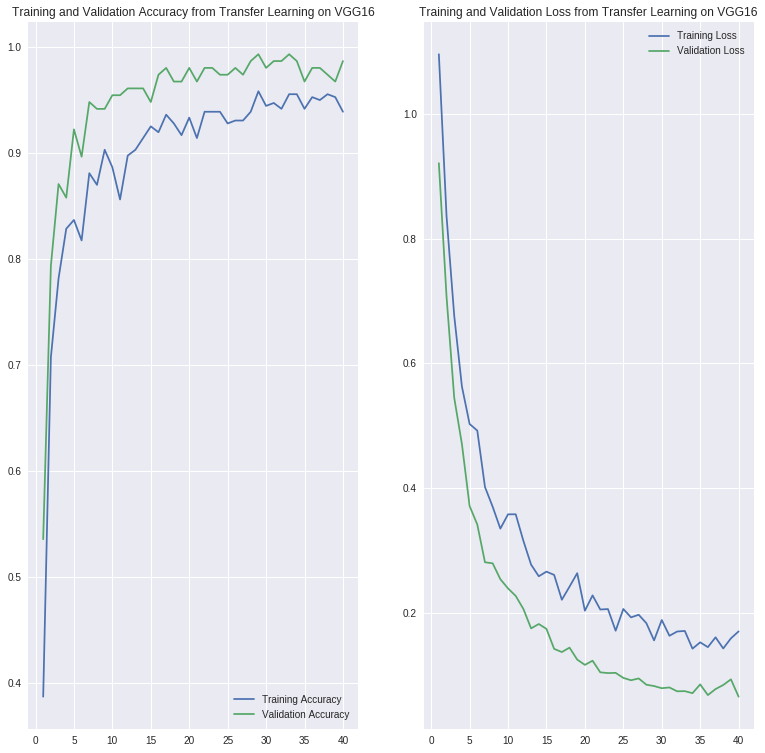

In [17]:
acc = vgg16_history.history['acc']
val_acc = vgg16_history.history['val_acc']

loss = vgg16_history.history['loss']                                              
val_loss = vgg16_history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(13,13))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy from Transfer Learning on VGG16')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss from Transfer Learning on VGG16')
plt.show()

## Show Testing Loss and Accuracy

In [18]:
vgg16_test_loss, vgg16_test_accuracy = vgg16_model.evaluate(test_data_gen, verbose=1)

3/3 [==============================] - 27s 9s/step - loss: 0.1058 - acc: 0.9625


In [19]:
print('The test accuracy is', vgg16_test_accuracy, 'and the test loss is', vgg16_test_loss)

The test accuracy is 0.9625 and the test loss is 0.10581271350383759


# Result
I got accuracy of 96% with VGG16 model with 14,747,715 parameters.